
[PubMed®](https://pubmed.ncbi.nlm.nih.gov/) comprises more than 36 million citations for biomedical literature from MEDLINE, life science journals, and online books. Citations may include links to full text content from PubMed Central and publisher web sites.

[BioPython](https://biopython.org/) is a set of freely available tools for biological computation written in Python by an international team of developers.
[BioEntrez](https://biopython.org/docs/latest/api/Bio.Entrez.html)

In [1]:
import pandas as pd
import json
!pip install biopython
from Bio import Entrez

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.2 MB/s eta 0:00:00


84e8301b1efb2a8e8bfbbe6969eeb6b34109

In [2]:
# Set your API key
key_info = json.loads(open('/content/sample_data/API.json', 'r').read())

Entrez.email =  key_info['email']
Entrez.api_key = key_info['key']

In [48]:
from Bio import Entrez, Medline  # Import the Medline module
import re
dates = []
search_term = 'tinnitus'
publication_date = '2000/01/01'
handle = Entrez.esearch(db="\.", term=search_term, mindate=publication_date, retmax=1000)
record = Entrez.read(handle)
handle.close()

# Fetch the publication dates for all retrieved records
id_list = record['IdList']
handle = Entrez.efetch(db="\.", id=id_list, rettype="medline", retmode="text")
records = Medline.parse(handle)  # Use Medline module to parse

# Extract and print the publication dates
for rec in records:
    if 'DP' in rec:
        #print(f"Publication Date: {rec['DP'][:4]}")
        dates.append(int(rec['DP'][:4]))

handle.close()


RuntimeError: ignored

In [40]:
len(dates)

1000

In [41]:
len(dates), min(dates), max(dates)

(1000, 1993, 2023)

In [43]:
counts

[747, 252, 1]

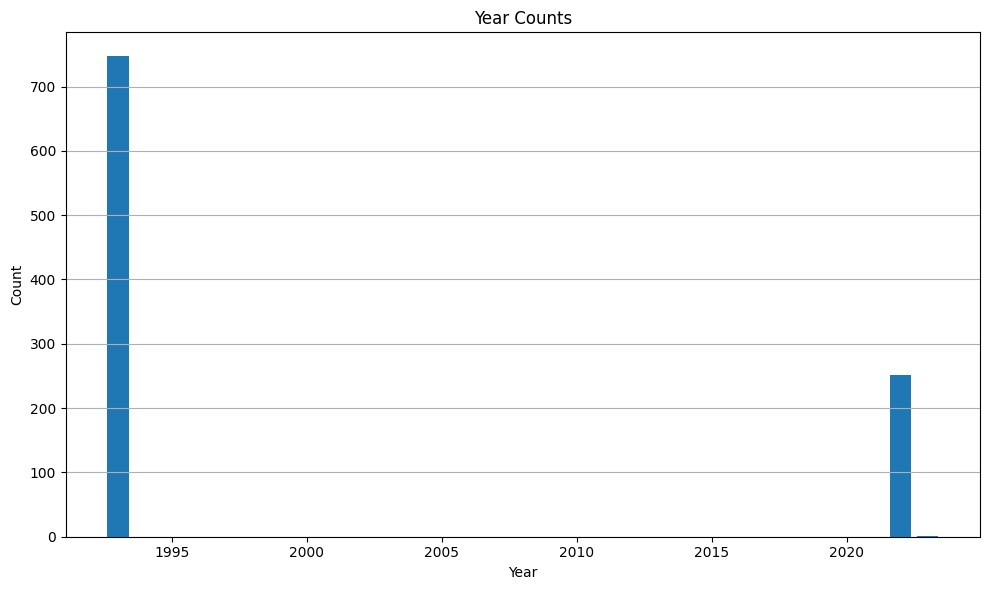

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each year
year_counts = Counter(dates)

# Extract unique years and their corresponding counts
unique_years = list(year_counts.keys())
counts = list(year_counts.values())

# Sort the unique years
unique_years.sort()

# Plot the year counts
plt.figure(figsize=(10, 6))
plt.bar(unique_years, counts)
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [4]:
search_term = 'tinnitus'
publication_date = '2015/01/01'
handle = Entrez.esearch(db="pubmed", term=search_term, mindate=publication_date, retmax=1000)  # Adjust retmax as needed
record = Entrez.read(handle)
handle.close()
print(f"{record['Count']} results found")

16449 results found


In [5]:
# Make a list of PubMed ids for all results
pmids = record['IdList']

# Create an empty DataFrame to store results
df = pd.DataFrame(columns=["PMID", "Title", "Abstract", "Authors", "Author Affiliations", "Author Keywords", "Publication Title", "Publication Year", "Mesh_Terms"])

In [ ]:
# Retrieve title, abstract & other metadata for each article
for pmid in pmids:
    try:
        handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml")
        record = Entrez.read(handle)
        handle.close()

        #print(json.dumps(record, indent=2))

        citation = record['PubmedArticle'][0]['MedlineCitation']
        keyword_list = citation.get('KeywordList', [])
        mesh_heading_list = citation.get('MeshHeadingList', [])

        article = citation['Article']
        title = article['ArticleTitle']
        author_list = article['AuthorList']

        # Check if the abstract is available
        if 'Abstract' in article:
            abstract = article['Abstract']['AbstractText']
            abstract = ' '.join(abstract)
        else:
            abstract = " "

        # Extract author names & author affiliations
        affiliations = []
        authors = []
        for author in author_list:
            if 'LastName' in author and 'Initials' in author:
                full_name = f"{author['LastName']} {author['Initials']}"
                authors.append(full_name)
            if 'AffiliationInfo' in author:
                affiliation_info = author['AffiliationInfo']
                if len(affiliation_info):
                  affiliation_name_first = affiliation_info[0]
                  affiliations.append(affiliation_name_first.get('Affiliation', "Not available"))


        # Extract author keywords
        keywords = []
        if len(keyword_list):
          for keyword in keyword_list[0]:
            keywords.append(keyword)

        # Extract Mesh terms
        mesh_terms = []
        if len(mesh_heading_list):
          for mesh_heading in mesh_heading_list:
            if 'DescriptorName' in mesh_heading:
              term = f"{mesh_heading['DescriptorName']}"
              mesh_terms.append(term)

        # Extract journal information and publication date
        journal_info = article['Journal']
        journal = journal_info.get('Title', 'Journal not available')
        issue = journal_info.get('JournalIssue', 'Journal issue not available')
        pub_date = issue.get('PubDate', 'PubDate not available')
        pub_year = pub_date.get('Year', 'Year not available')

        # Create a new DataFrame with the current data
        row = pd.DataFrame({
            "PMID": [pmid],
            "Title": [title],
            "Abstract": [abstract],
            "Authors": ['; '.join(authors)],
            "Author Affiliations": ['; '.join(affiliations)],
            "Author Keywords": [';'.join(keywords)],
            "Publication Title": [journal],
            "Publication Year": [pub_year],
            "Mesh_Terms": [';'.join(mesh_terms)],
        })

        # Concatenate the new DataFrame with the main DataFrame
        df = pd.concat([df, row], ignore_index=True)
    except Exception as e:
        print(f"Error retrieving data for PMID {pmid}: {str(e)}")

Error retrieving data for PMID 37615091: 'AuthorList'
Error retrieving data for PMID 32809341: list index out of range
Error retrieving data for PMID 32491810: list index out of range
Error retrieving data for PMID 33085368: list index out of range
Error retrieving data for PMID 32644542: list index out of range
Error retrieving data for PMID 29083835: list index out of range
Error retrieving data for PMID 30726044: list index out of range
Error retrieving data for PMID 37141871: 'AuthorList'
Error retrieving data for PMID 37141870: 'AuthorList'
Error retrieving data for PMID 32491626: list index out of range
Error retrieving data for PMID 20301380: list index out of range
Error retrieving data for PMID 31985946: list index out of range
Error retrieving data for PMID 32491645: list index out of range
Error retrieving data for PMID 28613560: list index out of range
Error retrieving data for PMID 32491341: list index out of range
Error retrieving data for PMID 32644745: list index out of

In [ ]:
df.head()

,PMID,Title,Abstract,Authors,Author Affiliations,Author Keywords,Publication Title,Publication Year,Mesh_Terms
0,37830801,Stenting for Venous Sinus Stenosis in Patients...,Although venous sinus stenting (VSS) improves ...,Lim J; Monteiro A; Kuo CC; Jacoby WT; Cappuzzo...,"Department of Neurosurgery, Jacobs School of M...",,Neurosurgery,2023,
1,37822285,Rapid Assessment of Subjective Hearing Complai...,Hearing difficulties are frequently reported b...,Davidson A; Ellis G; Sherlock LP; Schurman J; ...,"Audiology and Speech Center, Walter Reed Natio...",hearing;military medicine;surveys and question...,Trends in hearing,2023,
2,37820712,The physical and psychological effects of occu...,The aims were to highlight noise levels on boa...,Febriyanto K; Rahman FF; Guedes JCC,"Faculty of Engineering, University of Porto, P...",Health effects;noise exposure;sailors,International journal of environmental health ...,2023,
3,37820654,Therapeutic Effect of Tympanoplasty on Patient...,This research was conducted to investigate the...,Ma K; Wang Q; Liang W; Zhang M; Zhang Y; Wang Y,,,Alternative therapies in health and medicine,2023,
4,37820196,Avazum app usability testing.,"To verify the effectiveness, efficiency, and s...",Barboza HN; Lima MC; Ferreira RJDS; Rosa MRDD;...,"Departamento de Fonoaudiologia, Universidade F...",,CoDAS,2023,


In [ ]:
csv_file_name = 'pubmed_tinnitus.csv'
df.to_csv(csv_file_name)

# Topic Modeling

* Pre-process Text

In [ ]:
import pandas as pd

df = pd.read_csv('./pubmed_tinnitus.csv')

In [ ]:
print(len(df))
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
print(len(df))

980
980


In [ ]:
df['Publication Year'].min()

'2022'

## Pre-Processing

In [ ]:
df['Topic Content'] = df['Title'] + ' ' + df['Abstract'] + ' ' + df['Author Keywords'] + ' ' + df['Publication Title']

In [ ]:
type(df['Topic Content'][484])

str

In [ ]:
import re

clean = re.compile('<.*?>')

def remove_html_tags(text):
    """Remove html tags from a string"""
    return re.sub(clean, '', str(text))

df['Topic Content'] = df['Topic Content'].apply(lambda x: remove_html_tags(x))

In [ ]:
df['Topic Content'][484]

'Neurofibromatosis Type-2 presenting with vision impairment. Neurofibromatosis Type-2 (NF2) is an autosomal dominant genetic tumour-predisposing condition caused by mutations in the NF2 gene located on chromosome 22q12. It is characterized by multiple benign tumours of the central and peripheral nervous systems and meninges, causing high morbidity. Herein, presentation of a rare case of NF2 in a 36-year-old female who presented with right eye visual disturbances, followed by tinnitus with hearing impairment. The visual disturbance developed into blindness. Magnetic resonance imaging (MRI) was performed, which showed a right-side cerebellopontine angle vestibular schwannoma and multiple meningiomas around the brain. According to the MRI findings, the patient was diagnosed with NF2. This case report aims to elucidate the importance of early brain imaging in any visual disturbances in young adults and to highlight the key role of medical imaging in the diagnosis of rare cases. Moreover, t

### Medical Tokenizing

Using this [github](https://github.com/allenai/scispacy) to use the scispaCy model



In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_sm-0.5.3.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.3-py3-none-any.whl size=14776165 sha256=18db18cf4578ec3cb104b3d7e307fd05c3f56c91498e99f5698f967dd0a4f213
  Stored in directory: /root/.cache/pip/wheels/1a/27/08/5863b9fc5a65254f943eff433dd1e0fafc7ac4595be28d789d
Successfully built en-core-sci-sm


In [ ]:
import spacy
nlp = spacy.load("en_core_sci_sm")

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [ ]:
nlp.add_pipe("merge_noun_chunks")

<function spacy.pipeline.functions.merge_noun_chunks(doc: spacy.tokens.doc.Doc) -> spacy.tokens.doc.Doc>

In [ ]:
tokenized_articles = []
for article in nlp.pipe(df['Topic Content']):
    article_tokenized = [token.lemma_.lower() for token in article if token.ent_type_ == 'ENTITY' and not token.is_stop]
    tokenized_articles.append(article_tokenized)

In [ ]:
df['tokenized'] = tokenized_articles

In [ ]:
import gensim
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(df['tokenized'])
dictionary.filter_extremes(no_below=5)

In [ ]:
#A bag-of-words (BoW) representation is a way to represent text data as a sparse vector
# where each word in the document corresponds to a unique index in the vector, and the value at
# each index represents the frequency or count of that word in the document.
corpus = [dictionary.doc2bow(doc) for doc in df['tokenized']]

In [ ]:
from gensim.models import LdaMulticore
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=15, workers = 4, passes=10)

To evaluate the model, calculate a coherence score. The score measures the degree of semantic similarity between high scoring words in each topic

> The coherence score is a measure of how coherent or interpretable the topics are. It reflects the quality of the topic model, with higher scores indicating more coherent topics.

> The plot generated at the end can help you identify an appropriate number of topics for your text data.

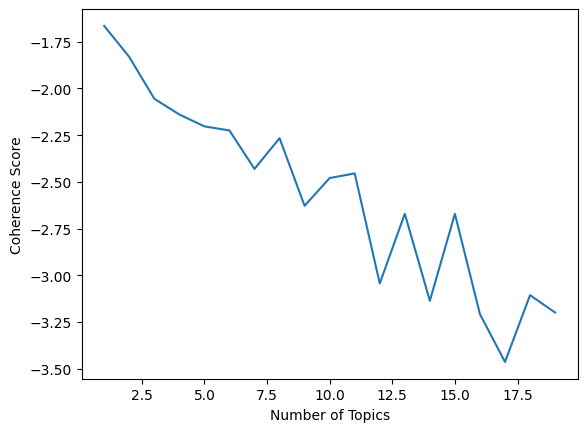

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt


topics = []
score = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i in range(1,20,1):
       lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
       cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
       topics.append(i)
       score.append(cm.get_coherence())
    _=plt.plot(topics, score)
    _=plt.xlabel('Number of Topics')
    _=plt.ylabel('Coherence Score')
plt.show()

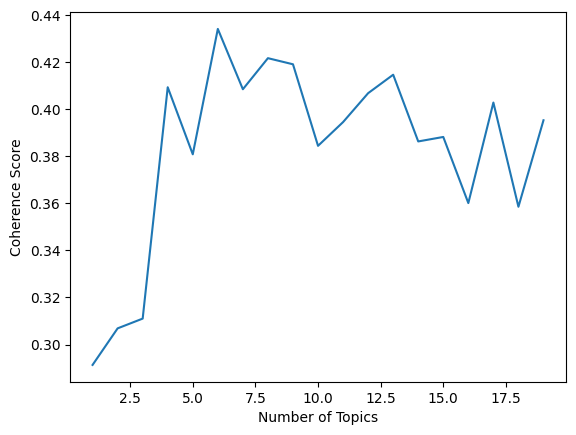

In [ ]:
# Calculating the coherence score using C_v
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = tokenized_articles, corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=10, workers = 4, passes=100)


In [ ]:
from gensim.models import CoherenceModel
cm = CoherenceModel(model=lda_model, texts = tokenized_articles, corpus=corpus, dictionary=dictionary, coherence='c_v')
cm.get_coherence()

0.4054199901972718

In [ ]:
for topic_id in range(10):
    top_terms = lda_model.show_topic(topic_id, topn=10)  # Get the top 10 terms for the topic
    # Create a label for the topic based on these terms
    topic_label = f"Topic {topic_id + 1}: {', '.join([term for term, _ in top_terms])}"
    print(topic_label)

Topic 1: loss, treatment, hearing, hear, sudden, patient, case, sensorineural, ssnhl, symptom
Topic 2: group, patient, treatment, control, hearing, study, symptom, evaluate, normal, ear
Topic 3: patient, disease, covid-19, vertigo, symptom, md, associate, loss, ear, hear
Topic 4: treatment, anxiety, depression, therapy, clinical, intervention, study, patient, chronic, distress
Topic 5: patient, hyperacusis, cochlear, ci, pain, study, adult, implantation, symptom, oto-rhino-laryngology
Topic 6: patient, pt, sinus, venous, clinical, study, pulsatile, management, sleep, ent
Topic 7: patient, vestibular, migraine, hear, symptom, schwannoma, loss, tumor, treatment, year
Topic 8: hear, loss, study, hearing, patient, age, year, factor, risk, health
Topic 9: auditory, system, cortex, sound, increase, hear, covid-19, noise, brain, loss
Topic 10: ear, artery, sinus, case, the patient, right, middle, pulsatile, vascular, surgical


In [ ]:
df['Topic Number'] = df['tokenized'].apply(lambda x: [topic_id for topic_id, _ in lda_model.get_document_topics(dictionary.doc2bow(x))])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Topic'][450]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0, 4]

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PMID,Title,Abstract,Authors,Author Affiliations,Author Keywords,Publication Title,Publication Year,Mesh_Terms,Topic Content,tokenized,Topic,Topic Number
0,37830801,Stenting for Venous Sinus Stenosis in Patients...,Although venous sinus stenting (VSS) improves ...,Lim J; Monteiro A; Kuo CC; Jacoby WT; Cappuzzo...,"Department of Neurosurgery, Jacobs School of M...",NaN,Neurosurgery,2023,NaN,Stenting for Venous Sinus Stenosis in Patients...,"[stente, venous, sinus, stenosis, patients, id...","[Vascular and Intracranial Tinnitus, Chronic E...","[1, 3, 8, 11, 13]"
1,37822285,Rapid Assessment of Subjective Hearing Complai...,Hearing difficulties are frequently reported b...,Davidson A; Ellis G; Sherlock LP; Schurman J; ...,"Audiology and Speech Center, Walter Reed Natio...",hearing;military medicine;surveys and question...,Trends in hearing,2023,NaN,Rapid Assessment of Subjective Hearing Complai...,"[rapid assessment, subjective, hearing, compla...","[Psychological Impact of Tinnitus, Cochlear Im...","[0, 8, 10]"
2,37820712,The physical and psychological effects of occu...,The aims were to highlight noise levels on boa...,Febriyanto K; Rahman FF; Guedes JCC,"Faculty of Engineering, University of Porto, P...",Health effects;noise exposure;sailors,International journal of environmental health ...,2023,NaN,The physical and psychological effects of occu...,"[occupational, noise, seafarer, a systematic r...","[Psychological Impact of Tinnitus, Age-Related...","[0, 10, 12, 13]"
3,37820654,Therapeutic Effect of Tympanoplasty on Patient...,This research was conducted to investigate the...,Ma K; Wang Q; Liang W; Zhang M; Zhang Y; Wang Y,NaN,NaN,Alternative therapies in health and medicine,2023,NaN,Therapeutic Effect of Tympanoplasty on Patient...,"[therapeutic effect, tympanoplasty, patient, c...","[Chronic Ear Conditions and Procedures, Sensor...","[3, 9, 14]"
4,37820196,Avazum app usability testing.,"To verify the effectiveness, efficiency, and s...",Barboza HN; Lima MC; Ferreira RJDS; Rosa MRDD;...,"Departamento de Fonoaudiologia, Universidade F...",NaN,CoDAS,2023,NaN,Avazum app usability testing. To verify the ef...,"[the effectiveness, efficiency, satisfaction, ...","[Psychological Impact of Tinnitus, Sound Thera...","[0, 6, 9, 10, 14]"


To get the URL:
https://pubmed.ncbi.nlm.nih.gov/PMID/


In [ ]:
df['Link'] = df['PMID'].apply(lambda x: f"https://pubmed.ncbi.nlm.nih.gov/{x}/")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.rename(columns={'Topic': 'Topics'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ArticleDB = df[['Title', 'Abstract', 'Authors', 'Author Affiliations', 'Publication Title', 'Publication Year', 'Author Keywords', 'Topics', 'Link']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ArticleDB.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Abstract,Authors,Author Affiliations,Publication Title,Publication Year,Author Keywords,Topics,Link
0,Stenting for Venous Sinus Stenosis in Patients...,Although venous sinus stenting (VSS) improves ...,Lim J; Monteiro A; Kuo CC; Jacoby WT; Cappuzzo...,"Department of Neurosurgery, Jacobs School of M...",Neurosurgery,2023,NaN,"[Vascular Disorders and Headache Management, S...",https://pubmed.ncbi.nlm.nih.gov/37830801/
1,Rapid Assessment of Subjective Hearing Complai...,Hearing difficulties are frequently reported b...,Davidson A; Ellis G; Sherlock LP; Schurman J; ...,"Audiology and Speech Center, Walter Reed Natio...",Trends in hearing,2023,hearing;military medicine;surveys and question...,"[Age-Related ENT Symptoms and Care, Hearing Lo...",https://pubmed.ncbi.nlm.nih.gov/37822285/
2,The physical and psychological effects of occu...,The aims were to highlight noise levels on boa...,Febriyanto K; Rahman FF; Guedes JCC,"Faculty of Engineering, University of Porto, P...",International journal of environmental health ...,2023,Health effects;noise exposure;sailors,"[Hearing Loss and Risk Factors, Middle Ear Con...",https://pubmed.ncbi.nlm.nih.gov/37820712/
3,Therapeutic Effect of Tympanoplasty on Patient...,This research was conducted to investigate the...,Ma K; Wang Q; Liang W; Zhang M; Zhang Y; Wang Y,NaN,Alternative therapies in health and medicine,2023,NaN,"[Clinical Treatment and Intervention, COVID-19...",https://pubmed.ncbi.nlm.nih.gov/37820654/
4,Avazum app usability testing.,"To verify the effectiveness, efficiency, and s...",Barboza HN; Lima MC; Ferreira RJDS; Rosa MRDD;...,"Departamento de Fonoaudiologia, Universidade F...",CoDAS,2023,NaN,"[Clinical Treatment and Intervention, Hyperacu...",https://pubmed.ncbi.nlm.nih.gov/37820196/


In [ ]:
ArticleDB.to_csv('ArticlesDatabase.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df['tokenized']))]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.topic.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     226
3     132
2     120
4      98
1      87
6      71
5      65
7      59
9      40
8      31
10     18
11     10
14      7
13      7
15      5
16      3
12      1
Name: topic, dtype: int64

## Visualizing

In [ ]:
!pip3 install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.5

In [ ]:
topic_titles = [
    "Psychological Impact of Tinnitus",
    "Vascular and Intracranial Tinnitus",
    "Rare Tumor Cases and Treatments",
    "Chronic Ear Conditions and Procedures",
    "Central Auditory Processing and Control",
    "Tinnitus and Migraine Associations",
    "Sound Therapy and Clinical Approaches",
    "Meniere's Disease and Vestibular Disorders",
    "Cochlear Implants and Quality of Life",
    "Sensorineural Hearing Loss and Treatments",
    "Age-Related Hearing Loss and Risk Factors",
    "Clinical Trials and Therapeutic Interventions",
    "Outcome Assessment in Ménière's Disease",
    "Headache and Temporomandibular Disorders",
    "Alternative Therapies and Treatment Evaluation",
    "Vestibular Schwannoma and Surgical Procedures",
    "COVID-19 and Hearing Loss"
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models

# Set the number of workers explicitly to 1 (single process)
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False, n_jobs=1)

pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.

In [ ]:
# Add a click handler to the bubble chart
pyldavis_vis.click_handler = """
function(topic) {
  // Do something when a bubble is clicked
  console.log(topic);
}
"""


In [ ]:
pyLDAvis.save_html(lda_display, 'lda-model.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

